In [180]:
import numpy as np
import pandas as pd
import tensorflow as tf 
from tensorflow import keras
# print(tf.__version__)
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [181]:
iris = pd.read_csv('dataset/iris.csv')
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [182]:
X = iris.iloc[:, 0:4]
y = iris.iloc[:, 4]
print(X.shape, y.shape)

(150, 4) (150,)


In [183]:
# Get unique target values
categoreis= np.unique(y)
categoreis
# y = keras.utils.to_categorical(y)

array(['Setosa', 'Versicolor', 'Virginica'], dtype=object)

In [184]:
# Initialize the LabelEncoder
encoder = LabelEncoder()

# Fit and transform
encoded_labels = encoder.fit_transform(y)

#Output 
encoded_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [185]:
y = keras.utils.to_categorical(encoded_labels)
y

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

In [186]:
y.shape

(150, 3)

In [187]:
#Split data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=9, stratify=y)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(120, 4) (120, 3)
(30, 4) (30, 3)


In [188]:
X_train.sample(10)

,sepal.length,sepal.width,petal.length,petal.width
92,5.8,2.6,4.0,1.2
74,6.4,2.9,4.3,1.3
42,4.4,3.2,1.3,0.2
142,5.8,2.7,5.1,1.9
4,5.0,3.6,1.4,0.2
6,4.6,3.4,1.4,0.3
53,5.5,2.3,4.0,1.3
98,5.1,2.5,3.0,1.1
61,5.9,3.0,4.2,1.5
76,6.8,2.8,4.8,1.4


In [189]:
X_test.sample(10)

,sepal.length,sepal.width,petal.length,petal.width
127,6.1,3.0,4.9,1.8
148,6.2,3.4,5.4,2.3
100,6.3,3.3,6.0,2.5
38,4.4,3.0,1.3,0.2
18,5.7,3.8,1.7,0.3
122,7.7,2.8,6.7,2.0
21,5.1,3.7,1.5,0.4
12,4.8,3.0,1.4,0.1
58,6.6,2.9,4.6,1.3
41,4.5,2.3,1.3,0.3


# Scaling data by Standardad Scaler 

In [190]:
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.fit_transform(X_test)

In [191]:
X_train[1]

array([0.68625788, 0.1128703 , 0.99937683, 0.79369554])

In [192]:
X_test[1]


array([-1.43589658,  1.40961448, -1.56657226, -1.32110964])

# Build the model

In [193]:
#Define a model 
model = Sequential()

# Add the first hidden layer with 10 neurons and 'relu' activation
model.add(Dense(10, activation='relu',input_shape=(4,)))# Replace 4 with the number of input features number of 3 plus 1 (3+1)

# Add the second hidden layer with 10 neurons and 'relu' activation
model.add(Dense(10, activation='relu',))

#Add a Dropuot layer with a rate of 0.5
model.add(Dropout(0.5))

#Add the output layer with 'softmax' activation
model.add(Dense(3, activation='softmax')) # Replace 3 with the number of classes

/home/m-fayzi/Desktop/Deep_Learning/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [194]:
# Adam optimizer with learning rate of 0.001
optimizer = Adam(learning_rate=0.001)

# Compile model 
model.compile(optimizer=optimizer, loss='categorical_crossentropy',metrics=['accuracy'])


In [195]:
# Display the model summary
model.summary()

Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_50 (Dense)                │ (None, 10)             │            50 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_51 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_52 (Dense)                │ (None, 3)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 193 (772.00 B)

 Trainable params: 193 (772.00 B)

 Non-trainable params: 0 (0.00 B)

In [196]:
# Model the Fit
train_model = model.fit(X_train, y_train, batch_size=5, epochs=200, validation_split=0.1)

Epoch 1/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.4980 - loss: 0.9945 - val_accuracy: 0.6667 - val_loss: 0.8764
Epoch 2/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4757 - loss: 0.9786 - val_accuracy: 0.8333 - val_loss: 0.8043
Epoch 3/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5333 - loss: 0.8564 - val_accuracy: 0.8333 - val_loss: 0.7521
Epoch 4/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5527 - loss: 0.8970 - val_accuracy: 0.8333 - val_loss: 0.7070
Epoch 5/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6099 - loss: 0.7910 - val_accuracy: 0.9167 - val_loss: 0.6720
Epoch 6/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5158 - loss: 0.8874 - val_accuracy: 0.9167 - val_loss: 0.6380
Epoch 7/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6362 - loss: 0.7103 - val_accuracy: 0.9167 - val_loss: 0.6059
Epoch 8/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5925 - loss: 0.7510 - val_accuracy: 0.9167 - 

In [197]:
# Access the keys of the history object
print(train_model.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


In [198]:
print('Accuracy:', np.max(train_model.history['accuracy']))
print('Validation Accuracy:', np.max(train_model.history['val_accuracy']))

print('Loss:',np.max(train_model.history['loss']))
print('Validation Loss:',np.max(train_model.history['val_loss']))


Accuracy: 0.9814814925193787
Validation Accuracy: 0.9166666865348816
Loss: 0.9815524816513062
Validation Loss: 0.8764092326164246


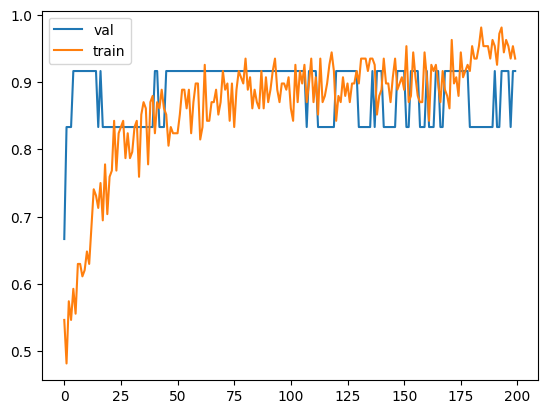

In [199]:
# Plot 
plt.plot(train_model.history['val_accuracy'])
plt.plot(train_model.history['accuracy'])
plt.legend(['val', 'train'])

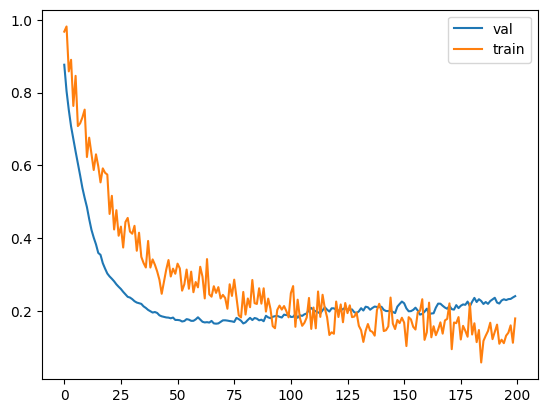

In [200]:
plt.plot(train_model.history['val_loss'])
plt.plot(train_model.history['loss'])
plt.legend(['val', 'train'])

# Model evaluation on test data

In [201]:
loss , accuracy = model.evaluate(X_test, y_test)
print('loss:', loss)
print('Accuracy:', accuracy)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9333 - loss: 0.0771
loss: 0.077140212059021
Accuracy: 0.9333333373069763


In [205]:
predicted= model.predict(X_test).argmax(axis=1)
y_pred = keras.utils.to_categorical(predicted)
print('Predicted Label:', y_pred)
print('True Label:', y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Predicted Label: [[1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]
True Label: [[1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


In [207]:
# y_pred == y_test
np.mean(y_pred == y_test)

np.float64(0.9555555555555556)